In [ ]:
## sklearn_digits07.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [ ]:
digits = datasets.load_digits()

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
len(digits.target)

1797

In [ ]:
type(digits.target)

numpy.ndarray

In [ ]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.unique(digits.data)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])

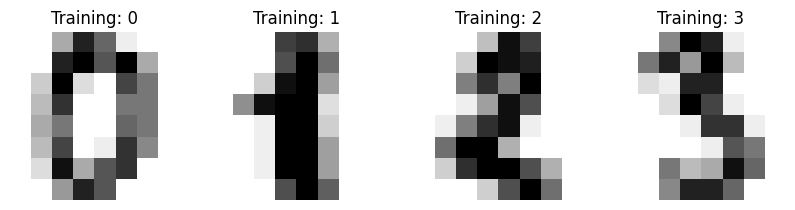

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

plt.show()

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [ ]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

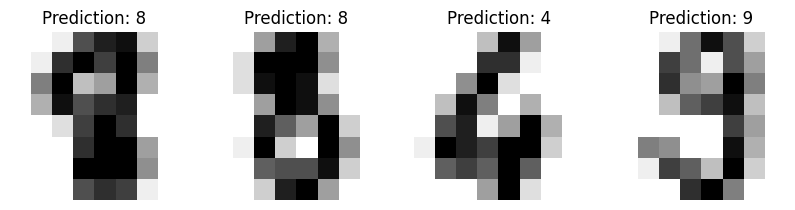

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')


In [ ]:
(predicted == y_test).sum() / len(y_test)

0.9688542825361512

In [ ]:
# plt.show()

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




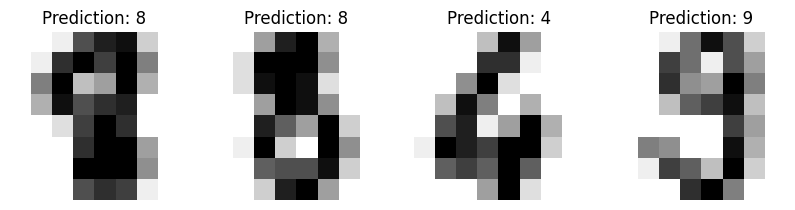

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
#disp = confusion_matrix(y_test, predicted)
#disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


In [ ]:
## sklearn_image10.py

# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
print(cv2.__version__)

4.7.0


In [51]:
path = ''
image = cv2.imread(path + "dog.jpg")
print(image)

[[[170 166 147]
  [169 165 146]
  [168 164 145]
  ...
  [180 181 172]
  [179 179 173]
  [177 177 171]]

 [[171 167 148]
  [169 165 146]
  [168 164 145]
  ...
  [179 180 171]
  [177 177 171]
  [175 175 169]]

 [[172 171 151]
  [170 169 149]
  [168 167 147]
  ...
  [181 182 173]
  [179 179 173]
  [177 177 171]]

 ...

 [[ 59  65  54]
  [ 28  34  23]
  [ 12  16   5]
  ...
  [185 183 172]
  [180 178 167]
  [183 181 170]]

 [[ 89  97  80]
  [ 42  50  33]
  [ 18  24   7]
  ...
  [184 182 171]
  [180 178 167]
  [182 180 169]]

 [[109 118  98]
  [ 59  68  48]
  [ 44  50  31]
  ...
  [184 182 171]
  [179 177 166]
  [179 177 166]]]


[[[170 166 147]
  [169 165 146]
  [168 164 145]
  ...
  [180 181 172]
  [179 179 173]
  [177 177 171]]

 [[171 167 148]
  [169 165 146]
  [168 164 145]
  ...
  [179 180 171]
  [177 177 171]
  [175 175 169]]

 [[172 171 151]
  [170 169 149]
  [168 167 147]
  ...
  [181 182 173]
  [179 179 173]
  [177 177 171]]

 ...

 [[ 59  65  54]
  [ 28  34  23]
  [ 12  16   5]
  ...
  [185 183 172]
  [180 178 167]
  [183 181 170]]

 [[ 89  97  80]
  [ 42  50  33]
  [ 18  24   7]
  ...
  [184 182 171]
  [180 178 167]
  [182 180 169]]

 [[109 118  98]
  [ 59  68  48]
  [ 44  50  31]
  ...
  [184 182 171]
  [179 177 166]
  [179 177 166]]]


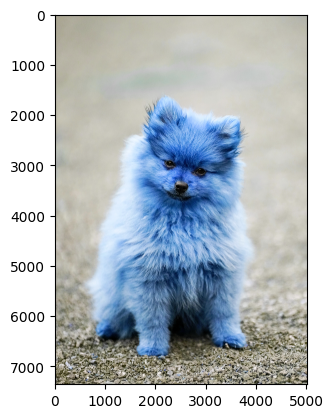

In [52]:
print(image)
plt.imshow(image)
plt.show()

In [56]:
# Show data type
print(type(image))
print(image)
print('dimension:', image.shape)
print('pixel:', image.size/3)

<class 'numpy.ndarray'>
[[[170 166 147]
  [169 165 146]
  [168 164 145]
  ...
  [180 181 172]
  [179 179 173]
  [177 177 171]]

 [[171 167 148]
  [169 165 146]
  [168 164 145]
  ...
  [179 180 171]
  [177 177 171]
  [175 175 169]]

 [[172 171 151]
  [170 169 149]
  [168 167 147]
  ...
  [181 182 173]
  [179 179 173]
  [177 177 171]]

 ...

 [[ 59  65  54]
  [ 28  34  23]
  [ 12  16   5]
  ...
  [185 183 172]
  [180 178 167]
  [183 181 170]]

 [[ 89  97  80]
  [ 42  50  33]
  [ 18  24   7]
  ...
  [184 182 171]
  [180 178 167]
  [182 180 169]]

 [[109 118  98]
  [ 59  68  48]
  [ 44  50  31]
  ...
  [184 182 171]
  [179 177 166]
  [179 177 166]]]
dimension: (7358, 5014, 3)
pixel: 36893012.0


In [57]:
print('first pixel:', image[0,0])

image_bgr = cv2.imread(path + "dog.jpg", cv2.IMREAD_COLOR)
print(image_bgr[0,0])


first pixel: [170 166 147]
[170 166 147]


[147 166 170]


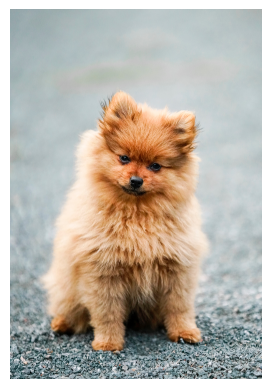

In [58]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_RGB2BGR)
print(image_rgb[0,0])
plt.imshow(image_rgb), plt.axis("off")
plt.show()

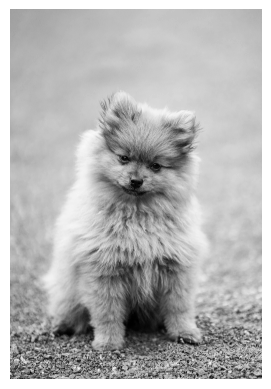

In [59]:
image_grey = cv2.imread(path + "dog.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image_grey, cmap='gray'), plt.axis("off")
plt.show()

In [62]:
cv2.imwrite(path + "dog_grey.jpg", image_grey)

True

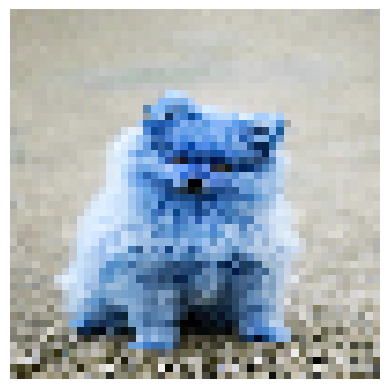

In [64]:
image_50x50 = cv2.resize(image, (50, 50))
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

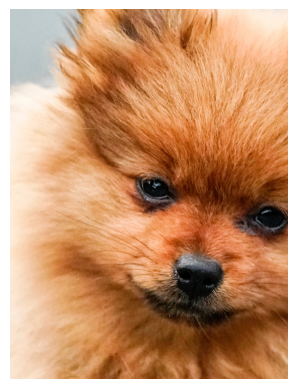

In [68]:
image256 = cv2.imread(path + "dog.jpg")
image_cropped = image256[2000:4000, 1500:3000]
image_cropped = cv2.cvtColor(image_cropped, cv2.COLOR_RGB2BGR)
plt.imshow(image_cropped), plt.axis("off")
plt.show()

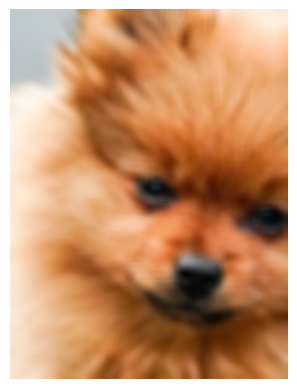

In [70]:
image_blurry = cv2.blur(image_cropped, (50,50))
plt.imshow(image_blurry), plt.axis("off")
plt.show()

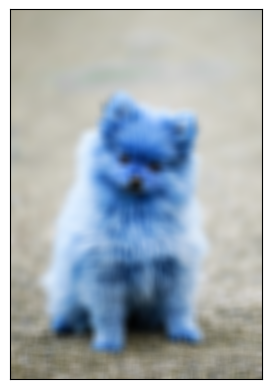

In [71]:
image_very_blurry = cv2.blur(image, (200,200))
plt.imshow(image_very_blurry), plt.xticks([]), plt.yticks([])
plt.show()

[[ 5 11 12  8  9]
 [11  5 15  0 16]
 [ 1 12  7 13  6]
 [ 5 11 10 14  4]
 [ 9  0 13  9  9]]
[[0.2  0.44 0.48 0.32 0.36]
 [0.44 0.2  0.6  0.   0.64]
 [0.04 0.48 0.28 0.52 0.24]
 [0.2  0.44 0.4  0.56 0.16]
 [0.36 0.   0.52 0.36 0.36]]


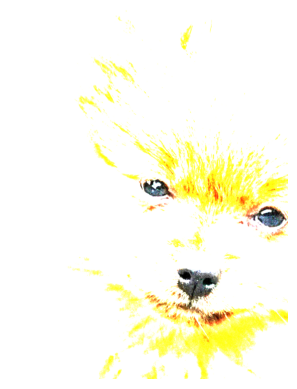

In [74]:
np.random.seed(1)
# Create kernel
my_array = np.random.randint(0, 17, size=(5,5))
print(my_array)
kernel = my_array / 25.0 # Show kernel
print(kernel)

# Apply kernel
image_kernel = cv2.filter2D(image_cropped, -1, kernel)
plt.imshow(image_kernel), plt.axis("off")
plt.show()

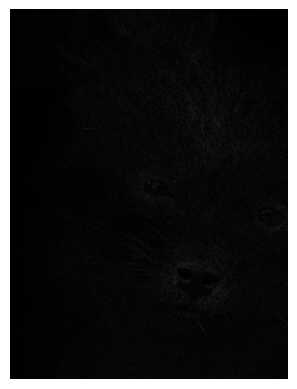

In [76]:
kernel = np.array([
    [0, -1, 0],
    [-1, 4,-1],
    [0, -1, 0]
])
image_sharp = cv2.filter2D(image_cropped, -1, kernel)
plt.imshow(image_sharp), plt.axis("off")
plt.show()

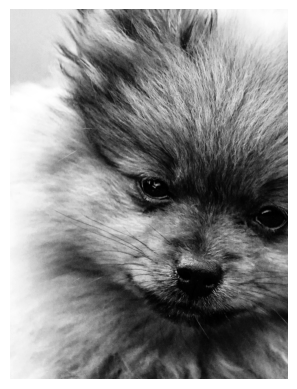

In [82]:
# Enhance image
image_cropped_grey = cv2.(image_cropped, cv2.COLOR_BGR2GRAY)
image_enhanced = cv2.equalizeHist(image_cropped_grey)
plt.imshow(image_enhanced, cmap='gray'), plt.axis("off")
plt.show()

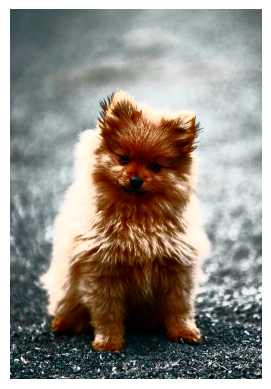

In [84]:
# Load image
image_bgr = cv2.imread("dog.jpg") # Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV) # Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
plt.imshow(image_rgb), plt.axis("off")
plt.show()

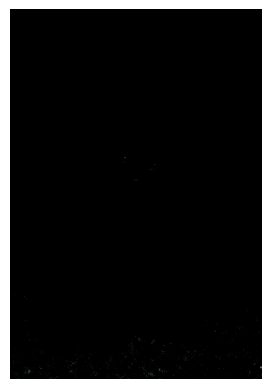

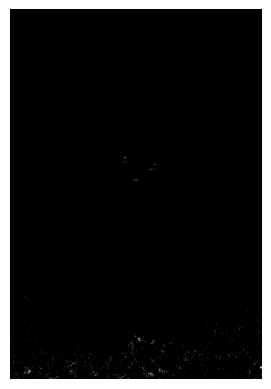

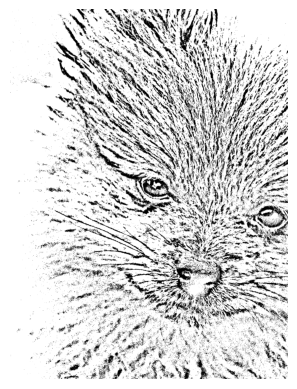

In [86]:
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
# Define range of blue values in HSV
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])
lower_blue = np.array([100,50,50])
upper_blue = np.array([200,255,255])
# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue) # Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask) # Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis("off")
plt.show()

plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_cropped_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

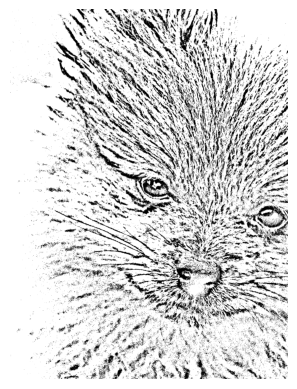

In [87]:
image_mean_threshold = cv2.adaptiveThreshold(image_cropped_grey,
                                                max_output_value,
                                                cv2.ADAPTIVE_THRESH_MEAN_C,
                                                cv2.THRESH_BINARY,
                                                neighborhood_size,
                                                subtract_from_mean)
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

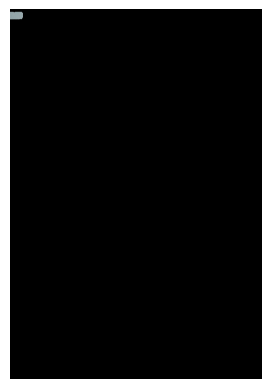

In [88]:
## reload images
image_bgr = cv2.imread('dog.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Rectangle values: start x, start y, width, height
rectangle = (0, 56, 256, 150) # Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)
# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
# Run grabCut 
cv2.grabCut(
    image_rgb, # Our image
    mask, # The Mask
    rectangle, # Our rectangle
    bgdModel, # Temporary array for background
    fgdModel, # Temporary array for background
    5, # Number of iterations
    cv2.GC_INIT_WITH_RECT
) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8') # Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

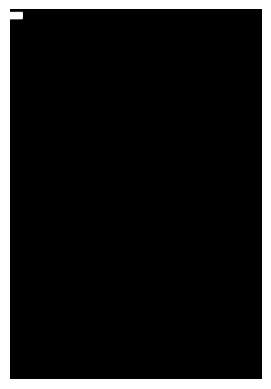

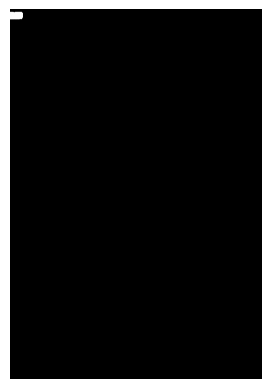

In [89]:
# Show mask
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

# Show mask2
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()

In [96]:
# Load image as grayscale
image_gray = cv2.imread(image_cropped_grey, cv2.IMREAD_GRAYSCALE) 

# Calculate median intensity
median_intensity = np.median(image_gray)

lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

TypeError: ignored